In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

import country_converter as coco

# HYPOTESIS
(filtrar por fecha)Seleccionar la epoca del año con más peligrosidad para seguro de deporte de riesgo

# OBJETIVOS

1.HIPOTESIS: Aumento del ataque de tiburones (enfoque de negocio)
2.Limipar data; filas sin data util
3.Data-time y convertir las fechas
4.Hacer gráficos entendibles para mostrar los datos (como mínimo dos)
5.

**FECHAS : arreglar fechas con date_time error = **cohrence**. Poner a los valores nulos una fecha para no perder data.

En las fechas nosotors nos enfocamos en los errores para así poder recuperarlos ya que son alrrededor de 840 valores, de otro modo perderíamos mucha data.

In [2]:
attacks = pd.read_csv('data/attacks.csv', encoding='unicode_escape')
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
attacks.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [6]:
attacks.tail(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Limpieza de nulos

In [7]:
#comprobamos que todas las columnas tienen valores nulos
attacks.isnull().any()

Case Number               True
Date                      True
Year                      True
Type                      True
Country                   True
Area                      True
Location                  True
Activity                  True
Name                      True
Sex                       True
Age                       True
Injury                    True
Fatal (Y/N)               True
Time                      True
Species                   True
Investigator or Source    True
pdf                       True
href formula              True
href                      True
Case Number.1             True
Case Number.2             True
original order            True
Unnamed: 22               True
Unnamed: 23               True
dtype: bool

In [8]:
#cantidad total de nulos por columnas
attacks.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [9]:
#eliminamos las filas donde sean todo valores nulos
attacks = attacks.dropna(how = "all")

In [10]:
# queremos aplicar un limite con un nro maximo de valores nulos por registro
attacks = attacks.dropna(thresh=21)

In [11]:
# drop de las columnas que no utilizaremos
attacks = attacks.drop(columns=['Name', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1','Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'], axis=1)
attacks


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger shark
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,ND.0068,Before 1962,0.0,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,M,36,Bumped by sharks,N,NaN,"""A pack of sharks"""
6241,ND.0065,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,M,25,Right hand severed,N,Afternoon,NaN
6242,ND.0064,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,6,Arm severed,N,Afternoon,Bull shark
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark


In [12]:
# devuelve la suma total de registros nulos por cada fila
attacks.isnull().sum(axis=1)

0       0
1       1
2       1
6       0
7       1
       ..
6239    1
6241    1
6242    0
6243    0
6265    0
Length: 2938, dtype: int64

In [13]:
# sabemos que máximo de valores nulos hay por fila
attacks.isnull().sum(axis=1).max()

1

In [14]:
attacks.tail(8)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
6160,1703.03.26,26-Mar-1703,1703.0,Unprovoked,BARBADOS,Southwest coast,Carlisle Bay,Swimming,M,19,"Hand and foot severely bitten, surgically ampu...",N,Night,NaN
6200,ND-0123,Before 2009,0.0,Unprovoked,USA,Florida,NaN,Shark tagging,F,21,Severe abrasion to forearm from captive shark ...,N,18h00,"Blacktip shark, 5'"
6226,ND.0087,"No date, Before 1975",0.0,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,M,19,"Ankle punctured & lacerated, hands abraded PRO...",N,NaN,"Nurse shark, 2.1 m [7']"
6239,ND.0068,Before 1962,0.0,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,M,36,Bumped by sharks,N,NaN,"""A pack of sharks"""
6241,ND.0065,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,M,25,Right hand severed,N,Afternoon,NaN
6242,ND.0064,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,6,Arm severed,N,Afternoon,Bull shark
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,M,13 or 14,"FATAL, left leg bitten with severe blood loss",Y,Afternoon,Bull shark


In [15]:
attacks.Date.tail(7).unique()

array(['Before 2009', 'No date, Before  1975', 'Before 1962', '1960s',
       '1941-1942'], dtype=object)

In [16]:
attacks['Date'] = attacks.Date.replace(['Before 2009'],['2009-01-01'])
attacks['Date'] = attacks.Date.replace(['No date, Before  1975'],['1975-01-01'])
attacks['Date'] = attacks.Date.replace(['Before 1962'],['1975-01-01'])
attacks['Date'] = attacks.Date.replace(['1960s'],['1960-01-01'])
attacks['Date'] = attacks.Date.replace(['1941-1942'],['1941-07-01'])

# Clean Dates

In [17]:
attacks['Date'] = pd.to_datetime(attacks['Date'], errors ='coerce')

In [18]:
def func(x):
    fecha = re.compile(r'^\d{4}([\-/.])(0?[1-9]|1[0-2])\1(3[01]|[12][0-9]|0?[1-9])$')
# validando 13/06/1982
    if fecha.search(x):
        return x
    else:
        if len(x) == 10:
            x = x[:9]+"1" #' cambiar el 0 a 1 '
        elif len(x)>10 :
            x = x[:10]
            
            
            
        return x.replace('00.00','01.01')

attacks['Case Number'] = attacks['Case Number'].apply(func)

In [19]:
def func(x):
    fecha = re.compile(r'^\d{4}([\-/.])(0?[1-9]|1[0-2])\1(3[01]|[12][0-9]|0?[1-9])$')
# validando 13/06/1982
    if fecha.search(x):
        return x
    else:
        if len(x) == 10:
            x = x[:9]+"1" #' cambiar el 0 a 1 '
        elif len(x)>10 :
            x = x[:10]
            
            
            
        return x.replace('00.01','01.01')

attacks['Case Number'] = attacks['Case Number'].apply(func)

In [20]:
attacks['Case Number'].str.len().unique()

array([10,  7], dtype=int64)

In [21]:
attacks.loc[attacks['Date'].isnull(),"Date"] = attacks.loc[attacks['Date'].isnull(),"Case Number"] 

In [22]:
attacks['Date'] = pd.to_datetime(attacks['Date'], errors ='coerce')

In [23]:
attacks[attacks['Date'].isnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species


In [24]:
# normalizamos Year
attacks['Year'] = attacks['Date'].dt.year

In [25]:
# normalizamos los Case Number en Items
attacks['Case Number'] = list(range(1,2939))
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,1,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,3,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
6,4,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger shark
7,5,2018-05-27,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,2934,1975-01-01,1975,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,M,36,Bumped by sharks,N,NaN,"""A pack of sharks"""
6241,2935,1960-01-01,1960,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,M,25,Right hand severed,N,Afternoon,NaN
6242,2936,1960-01-01,1960,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,6,Arm severed,N,Afternoon,Bull shark
6243,2937,1960-01-01,1960,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark


In [26]:
tab_frec_data = pd.crosstab(attacks['Year'],'count').tail(30)
tab_frec_data

col_0,count
Year,
1989,33
1990,25
1991,31
1992,34
1993,25
1994,28
1995,37
1996,39
1997,37


<AxesSubplot:xlabel='Year'>

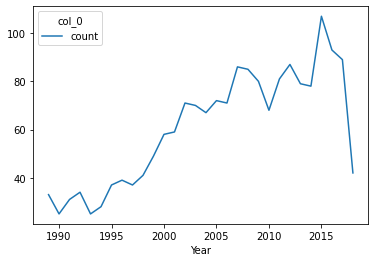

In [27]:
tab_frec_data.plot()

# Clean Type

In [28]:
# Seleccionamos los valores unicos en Type para ver los tipos de incidentes

attacks.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Boat', 'Sea Disaster'], dtype=object)

In [29]:
# Quitamos el valor nulo para poder trabajar con la función más adelante
attacks.Type.replace(np.nan, 'Invalid', inplace=True)

In [30]:
attacks.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Boat', 'Sea Disaster'], dtype=object)

In [31]:

# en vez de hacer un replace, creamos una funcion
#attacks["Type"] = attacks.Type.replace(['Boat'], ['Boating']) 
# TODO LO QUE EMPIEZA POR BOAT SE CONVIERTE EN BOATING con startwith

def clean_type(typ):
    return('Boating' if typ.strip().startswith('Boat') else typ.strip())
    
attacks['Type']=attacks.Type.apply(lambda x:clean_type(x));
#DA ERROR PQ HAY UN NULO/NAN

In [32]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,1,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,3,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
6,4,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger shark
7,5,2018-05-27,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,2934,1975-01-01,1975,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,M,36,Bumped by sharks,N,NaN,"""A pack of sharks"""
6241,2935,1960-01-01,1960,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,M,25,Right hand severed,N,Afternoon,NaN
6242,2936,1960-01-01,1960,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,6,Arm severed,N,Afternoon,Bull shark
6243,2937,1960-01-01,1960,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark


In [33]:
# comprobamos
attacks.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster'], dtype=object)

In [34]:
#establecemos una tabla de frecuenca en la columna Type
tab_frec_type = pd.crosstab(attacks['Type'],'count')
tab_frec_type

col_0,count
Type,
Boating,55
Invalid,99
Provoked,247
Questionable,2
Sea Disaster,21
Unprovoked,2514


<AxesSubplot:xlabel='Type'>

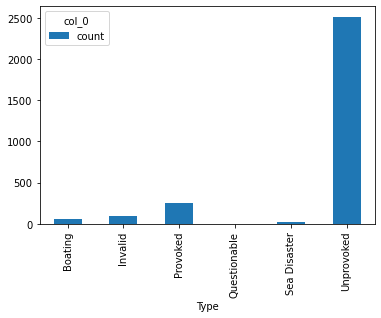

In [35]:
# con la tabla de frec creamos un gráfico de barras
tab_frec_type.plot.bar()

In [36]:
# Agregamos columna de porcentaje
tab_frec_type['percent'] = ((tab_frec_type['count']/tab_frec_type['count'].sum())*100).round(2)
tab_frec_type



col_0,count,percent
Type,,
Boating,55,1.87
Invalid,99,3.37
Provoked,247,8.41
Questionable,2,0.07
Sea Disaster,21,0.71
Unprovoked,2514,85.57


<AxesSubplot:xlabel='Type'>

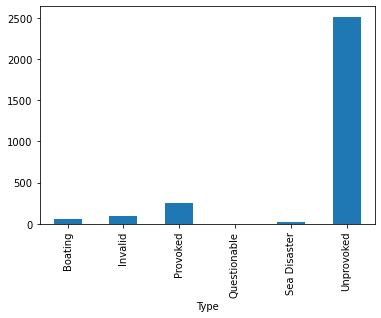

In [37]:
tab_frec_type['count'].plot.bar()


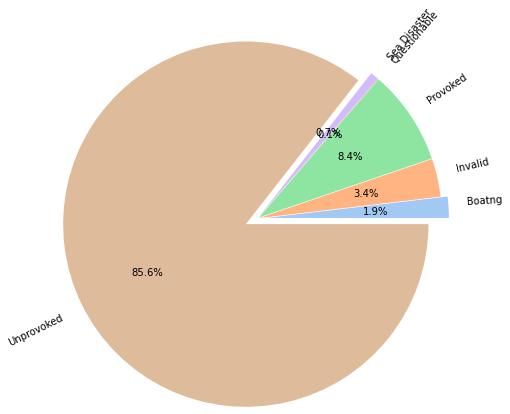

In [38]:

data = [1.87, 3.37, 8.41, 0.07, 0.71, 85.57]
explode = [0.10,0.02,0.02,0.02,0.02,0.15]
labels = ['Boatng', 'Invalid', 'Provoked', 'Questionable', 'Sea Disaster', 'Unprovoked']
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, radius = 2.1, colors = colors,rotatelabels=True, autopct = '%0.1f%%', explode = explode)
plt.show()


# Clean Sex

In [39]:
# Corregimos nombre Sex/Species sin espacios
attacks.rename(columns={'Sex ':'Sex',
                        'Species ':'Species'},
               inplace=True)
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species'],
      dtype='object')

In [40]:
attacks.Sex.nunique()

attacks.Sex.unique()

attacks['Sex'] = attacks.Sex.replace(['M '],['M'])

In [41]:
attacks.Sex.value_counts()

M      2523
F       406
lli       1
Name: Sex, dtype: int64

In [42]:
#Reemplazamos "lli" por "M"
attacks['Sex'] = attacks.Sex.replace(['lli'],['M'])

In [43]:
attacks.Sex.isnull().sum()

8

In [44]:
attacks[~attacks.Sex.isin(['M', 'F'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
1743,1210,2003-09-14,2003,Boating,SOUTH AFRICA,Western Cape Province,Melkbosstrand,Fishing,NaN,36 & 26,"No injury to occupants, shark bit boat",N,09h40,2 m cow shark
1995,1393,2000-10-29,2000,Boating,AUSTRALIA,Queensland,Peel Island,Fishing,NaN,31,"No Injury to occupant, shark holed and sank boat",N,22h00,White shark
2225,1541,1997-09-08,1997,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,NaN,17,2 small lacerations to bottom of foot,N,Evening,small blacktip shark
3459,2203,1968-08-24,1968,Unprovoked,USA,Florida,Half mile north of Juno Beach Pier,Playing with a frisbee in the shallows,NaN,9 & 12,"Shark bumped Colleen, the nudged Scott, then b...",N,16h00,a small hammerhead shark
3768,2367,1963-01-14,1963,Provoked,NEW ZEALAND,North Island,"Petone Beach, Wellington",Fishing,NaN,14,Minor lacerations to hand and arm after he sei...,N,Afternoon,"Grey nurse shark, 1.8 m [6']"
4035,2494,1959-12-28,1959,Boating,AUSTRALIA,New South Wales,"Leichardt, Sydney",Fishing,NaN,50 & 30,No injury to occupants,N,Late night,2.4 m [8'] shark
4390,2611,1953-01-08,1953,Boating,AUSTRALIA,Tasmania,Wynyard,Fishing,NaN,MAKE LINE GREEN,"No injury to occupant, shark charged boat",N,Afternoon,10' to 12' shark
4403,2616,1952-08-05,1952,Provoked,ITALY,Teramo,Giulianova,Fishing,NaN,19,Multiple injuries PROVOKED INCIDENT,Y,02h00,2m shark


In [45]:
# todos los vacíos se convierten en M
attacks['Sex'] = attacks.Sex.fillna('M')

In [46]:
attacks.loc[4390,['Sex']] = ['F']

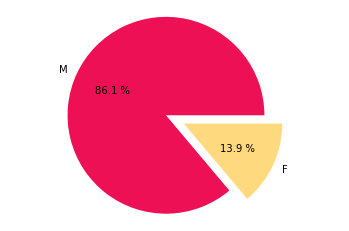

In [47]:
Genere = [2523, 406]
nombres = ["M", "F"]
colores = ["#EE1055","#FFD97D"]
desfase = (0, 0.2)
plt.pie(Genere, labels=nombres, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

# Clean Fatal Y/N

In [48]:
attacks['Fatal (Y/N)'].value_counts()

N          2392
Y           456
 N            4
UNKNOWN       2
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [49]:
#renombramos la columna de Fatal Y/N a Fatal, para trabajar más fácilmente

attacks.rename(columns={'Fatal (Y/N)': 'Fatal'}, inplace = True)


In [50]:
#Quitamos con drop los casos: 'UNKNOWN', 'M', '2017' y ' N'

attacks.Fatal.replace('UNKNOWN', 'N', inplace=True)
attacks.Fatal.replace('M', 'N', inplace=True)
attacks.Fatal.replace('2017', 'Y', inplace=True)
attacks.Fatal.replace(' N', 'N', inplace=True)

In [51]:
# Nos quedamos con N e Y.
attacks['Fatal'].unique()

array(['N', 'Y', nan], dtype=object)

In [52]:
# cambiamos los valores nulos por N para no perder data

attacks['Fatal'].fillna(value = 'N' , inplace=True)
attacks


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species
0,1,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,3,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
6,4,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger shark
7,5,2018-05-27,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,2934,1975-01-01,1975,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,M,36,Bumped by sharks,N,NaN,"""A pack of sharks"""
6241,2935,1960-01-01,1960,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,M,25,Right hand severed,N,Afternoon,NaN
6242,2936,1960-01-01,1960,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,6,Arm severed,N,Afternoon,Bull shark
6243,2937,1960-01-01,1960,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark


In [53]:
attacks['Fatal'].value_counts()

N    2481
Y     457
Name: Fatal, dtype: int64

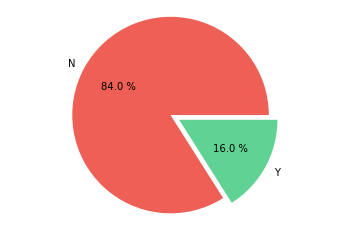

In [54]:

FattalAttacks = [2392, 456]
nombres = ["N", "Y"]
colores = ["#EE6055","#60D394"]
desfase = (0, 0.1)
plt.pie(FattalAttacks, labels=nombres, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

# Clean Activity

In [55]:
# de un primer vistazo observamos que todas las actividades acaban en "ing".
attacks['Activity'].value_counts().head(10)

Surfing          745
Swimming         458
Spearfishing     202
Wading           117
Fishing          115
Standing          71
Snorkeling        67
Body boarding     54
Scuba diving      46
Body surfing      41
Name: Activity, dtype: int64

In [56]:
attacks
print(745/2938)
print(458/2938)
print(202/2938)



0.25357385976855
0.15588835942818244
0.06875425459496257


In [57]:
attacks[['Activity','Sex']]

,Activity,Sex
0,Paddling,F
1,Standing,F
2,Surfing,M
6,Swimming,M
7,Fishing,M
...,...,...
6239,Skindiving,M
6241,Fishing from a small boat & put his hand in th...,M
6242,Swimming naked near a date palm where many dat...,M
6243,Swimming in section of river used for washing ...,M


<AxesSubplot:>

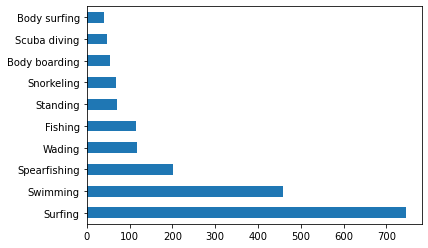

In [58]:
# Buscamos los valores únicos que hay en la columna activity y su proporción
# Establecemos las 10 actividades con más incidencias
z = attacks.Activity.value_counts(ascending=False).head(10)
z.plot(kind = "barh")

<AxesSubplot:ylabel='Activity'>

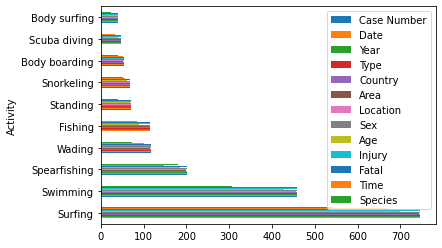

In [59]:

attacks.groupby("Activity").count().sort_values(["Date"], ascending=False).head(10).plot(kind = "barh")


# Clean Country

In [60]:
#Utilizamos country_converter que es un paquete de Python para convertir y combinar nombres 
#de países entre diferentes clasificaciones y entre diferentes versiones de nombres. 
#Internamente utiliza expresiones regulares para hacer coincidir los nombres de los países.

cc = coco.CountryConverter()

#Formatting country names
attacks.Country = attacks.Country.str.strip() # quitar espacios
attacks.Country = attacks.Country.str.strip('?') #quitar interrogantes
attacks.Country = attacks.Country.str.upper() #convertirlo todo a mayúscula

# Hacemos replace de los paises que no se han convertido ya que son 
# datos que han sido introducido con erratas. Lo que nos queda son los oceanos

attacks.Country.replace('BETWEEN PORTUGAL & INDIA', 'PORTUGAL', inplace=True)
attacks.Country.replace('EQUATORIAL GUINEA / CAMEROON', 'EQUATORIAL GUINEA', inplace=True)
attacks.Country.replace('ITALY / CROATIA', 'ITALY', inplace=True)
attacks.Country.replace('IRAN / IRAQ', 'IRAN', inplace=True)
attacks.Country.replace('ADMIRALTY ISLANDS', 'PAPUA NEW GUINEA', inplace=True)
attacks.Country.replace('ANDAMAN / NICOBAR ISLANDAS', 'INDIA', inplace=True)
attacks.Country.replace('AZORES', 'PORTUGAL', inplace=True)
attacks.Country.replace('BRITISH ISLES', 'UNITED KINGDOM', inplace=True)
attacks.Country.replace('BRITISH WEST INDIES', 'VIRGIN ISLANDS, BRITISH', inplace=True)
attacks.Country.replace('COLUMBIA', 'COLOMBIA', inplace=True)
attacks.Country.replace('EGYPT / ISRAEL', 'EGYPT', inplace=True)
attacks.Country.replace('ENGLAND', 'UNITED KINGDOM', inplace=True)
attacks.Country.replace('JOHNSTON ISLAND', 'UNITED STATES', inplace=True)
attacks.Country.replace('NETHERLANDS ANTILLES', 'NETHERLANDS', inplace=True)
attacks.Country.replace('OKINAWA', 'JAPAN', inplace=True)
attacks.Country.replace('SCOTLAND', 'UNITED KINGDOM', inplace=True)
attacks.Country.replace('ST. MAARTIN', 'SAINT MARTIN (FRENCH PART)', inplace=True)

attacks['Country'] = cc.convert(names=attacks.Country, to='name_short', not_found=np.nan)


PACIFIC OCEAN not found in regex
MID ATLANTIC OCEAN not found in regex
NORTH PACIFIC OCEAN not found in regex
NORTH SEA not found in regex
PACIFIC OCEAN not found in regex
PACIFIC OCEAN not found in regex
PACIFIC OCEAN not found in regex
SOUTH ATLANTIC OCEAN not found in regex
SOUTH ATLANTIC OCEAN not found in regex


In [61]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species
0,1,2018-06-25,2018,Boating,United States,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2,2018-06-18,2018,Unprovoked,United States,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,3,2018-06-09,2018,Invalid,United States,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
6,4,2018-06-03,2018,Unprovoked,Brazil,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger shark
7,5,2018-05-27,2018,Unprovoked,United States,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,2934,1975-01-01,1975,Unprovoked,Mozambique,Maputo Province,Santa Maria Peninsula,Skindiving,M,36,Bumped by sharks,N,NaN,"""A pack of sharks"""
6241,2935,1960-01-01,1960,Unprovoked,Iraq,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,M,25,Right hand severed,N,Afternoon,NaN
6242,2936,1960-01-01,1960,Unprovoked,Iraq,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,6,Arm severed,N,Afternoon,Bull shark
6243,2937,1960-01-01,1960,Unprovoked,Iraq,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark


In [63]:
tab_frec_country = attacks.Country.value_counts(ascending=False).head(10)
tab_frec_country

United States       1383
Australia            636
South Africa         354
Bahamas               49
New Zealand           47
Brazil                42
Reunion               34
Mexico                31
Papua New Guinea      24
Mozambique            21
Name: Country, dtype: int64

<AxesSubplot:>

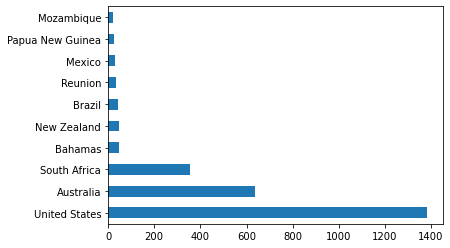

In [64]:
tab_frec_country.plot(kind = "barh")